El método de Euler aplicado a la ecuación
$$v' = (a+2\bar{u})v + (a\bar{u} + \bar{u}^2)$$
la cual resulta de linealizar la ecuación
$$u' = au + u^2$$
resulta estable cuando
$$|1+k(a+2\bar{u})| \leq 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
N = 1001
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
x,y = np.meshgrid(x,y)
plano = x + y*1j

In [58]:
k = 1     # paso de tiempo
ubar = 0    # valor $\bar{u}$ cercano a la solución $u$
condicion = 1 + k * (plano + 2*ubar)

In [59]:
norma = np.sqrt( condicion.real**2 + condicion.imag**2 ) <= 1

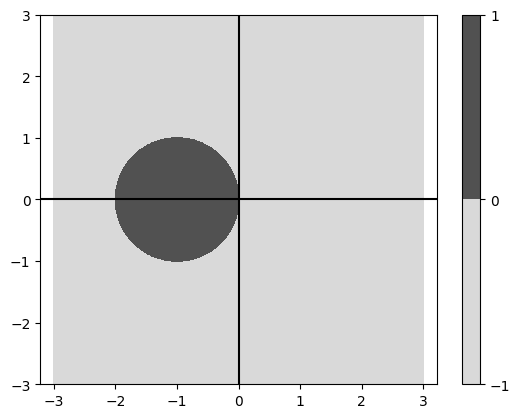

In [60]:
plt.contourf(
    x,
    y,
    norma,
    levels=np.array([-1,0,1]),
    cmap="Greys"
)
plt.axhline(0, color="k")
plt.axvline(0, color="k")
plt.colorbar()
plt.axis("equal")
plt.show()

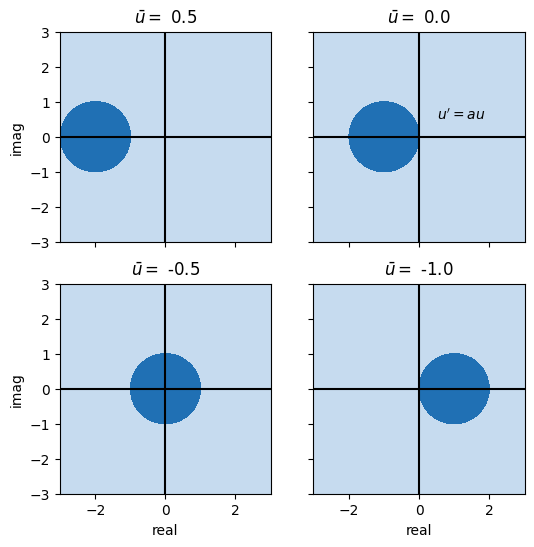

In [91]:
ubars = np.array([0.5,0,-0.5,-1])
fig, axs = plt.subplots(2,2, figsize=(6,6))
for i in range(ubars.shape[0]):
    u = ubars[i]
    condicion = 1 + k * (plano + 2*u)
    norma = np.sqrt( condicion.real**2 + condicion.imag**2 ) <= 1
    ax = axs.flat[i]
    ax.contourf(
        x,
        y,
        norma,
        levels=np.array([-1,0,1]),
        cmap="Blues"
    )
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")
    ax.axis("equal")
    ax.set_title(r"$\bar{u}=$ %1.1f" %u)
    ax.set_xlabel("real")
    ax.set_ylabel("imag")
    if u == 0.0:
        ax.text(0.5,0.5,"$u'=au$")
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figuras/A-Stability-dudt=au+u2.pdf")
plt.show()